### Introduction
This notebook shows how using differential privacy (DP) in decentralized learning (DL) and federated learning (FL) change the accuracy and privacy.

In [22]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [23]:
def read(name):
    df = pd.DataFrame()
    for i in glob.iglob('../results/compl/{}*.csv'.format(name)):
        curr = pd.read_csv(i)
        curr['type'] = name
        norm, noise = curr['max_norm'][0], curr['noise_multiplier'][0]
        curr['name'] = 'norm={},noise={}'.format(norm, noise)
        if 'nodp' in i:
            curr['name'] = 'No DP'
        df = pd.concat([df, curr])
    return df

In [24]:
def plot(df, x = 'iter', y = 'accuracy', logy = False, logx = False, 
         title = '', agg = 'name', sh_var = 'max_norm', legtitle = '',
         xlim = None, ylim = None, scatter = False, linewidth = 4):
    df = df.copy()
    df['iter'] = df['iter']
    plt.figure(figsize = (6, 6))
    for name in sorted(np.unique(df[agg])):
        curr = df[df[agg] == name]
        if scatter:
            plt.scatter(curr[x], curr[y], label = name, alpha = 0.5)
        else:
            plt.plot(curr[x], curr[y], label = name, alpha = 0.5, linewidth = linewidth)
    if logy:
        plt.yscale('log')
    if logx:
        plt.xscale('log')
    #plt.ylim(ylim)
    plt.xlim(xlim)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title = legtitle)
    plt.show()

The non DP version runs for shorter because it makes more iterations until sharing parameters. So it does the same number of training epochs as the DP version.

### How does DP influence the performance of DL?

The most accurate DP version of DL is as accurate as the standard version. But, some versions of DL with DP are less precise. The bigger the noise, the less precise the model becomes. The larger the norm, the faster it approaches convergence.

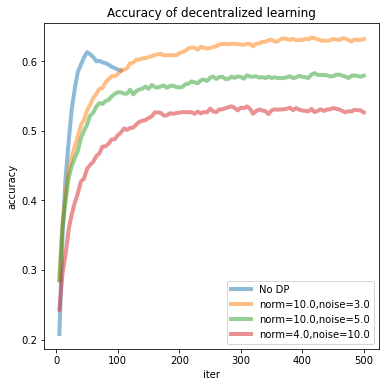

In [25]:
dl = read('dl')
plot(dl, title = 'Accuracy of decentralized learning')

A model with less accuracy can still be useful because it uses a smaller privacy budget.

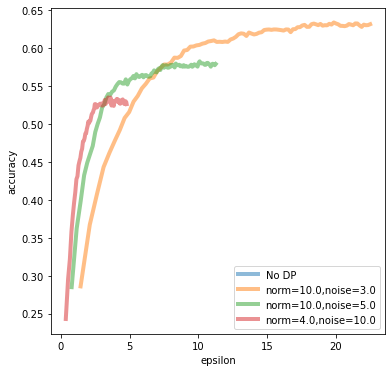

In [26]:
plot(dl, x = 'epsilon')

### How does DP influence the privacy of DL?

Not using DP makes the model very susceptible to good MIA.

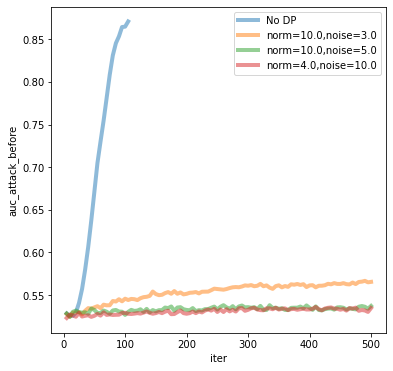

In [27]:
plot(dl, y = 'auc_attack_before')

The higher the noise, the less effective is the MIA. The norm does not seem to affect it.

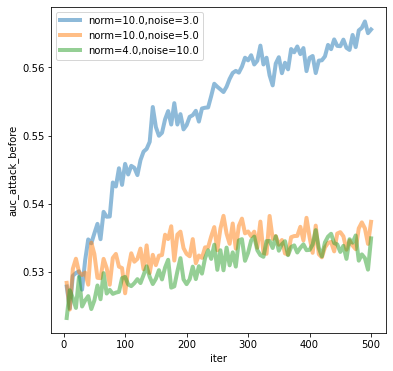

In [28]:
dl_dp = dl[dl['max_norm'] != 1.0]
plot(dl_dp, y = 'auc_attack_before')

A greater $\epsilon$ is correlated to a greater accuracy of the MIA. Although, all values are much smaller than without DP.

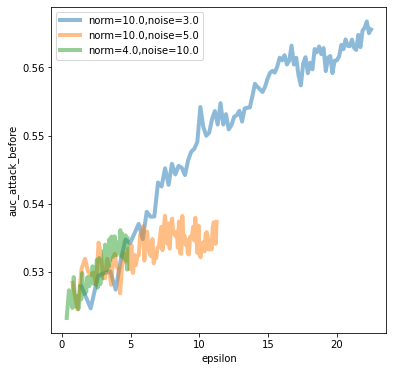

In [29]:
plot(dl_dp, y = 'auc_attack_before', x = 'epsilon')

### Do the types of attacks change the MIA effectiveness? 

In [30]:
dl_bad = pd.read_csv('../results/dl-nodp.csv')
dl_good = dl[dl['name'] == 'No DP']

In [31]:
dl_bad = dl_bad[dl_bad['iter'] <= 100]
dl_good=dl_good[dl_good['iter']<= 100]

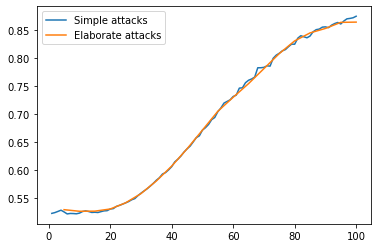

In [32]:
plt.plot(dl_bad['iter'], dl_bad['auc_attack_before'], label = 'Simple attacks')
plt.plot(dl_good['iter'],dl_good['auc_attack_before'],label='Elaborate attacks')
plt.legend()
plt.show()

No.

### How does DP influence the performance of FL?

In a similar way, the larger norm makes the model stabilize faster, while the larger the noise, the less accurate the model is. The version that is not DP, is as good as the best DP version.

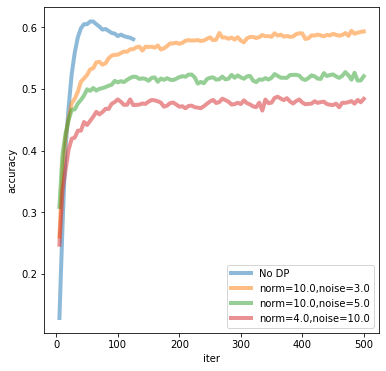

In [17]:
fl = read('fl')
plot(fl)

$\epsilon$ has the same effect in Decentralized Leraning and in Federated Learning.

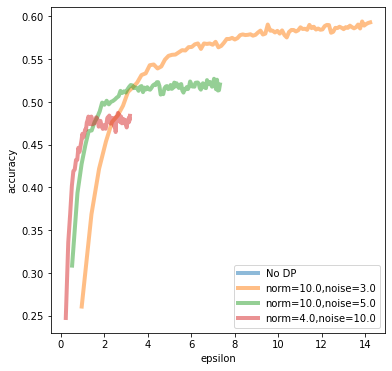

In [18]:
plot(fl, x = 'epsilon')

Again, it is the same thing in DL and FL.

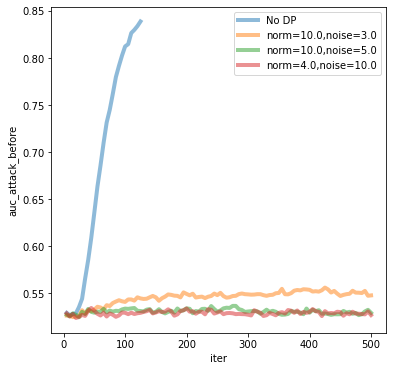

In [19]:
plot(fl, y = 'auc_attack_before')

The version with higher norm and lower noise is the least resistant to attacks.

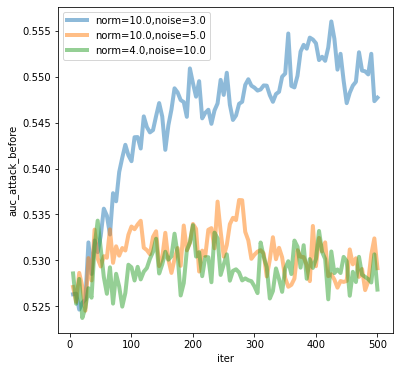

In [20]:
fl_dp = fl[fl['max_norm'] != 1.0]
plot(fl_dp, y = 'auc_attack_before')

The more effective the attack is, the higher the $\epsilon$.

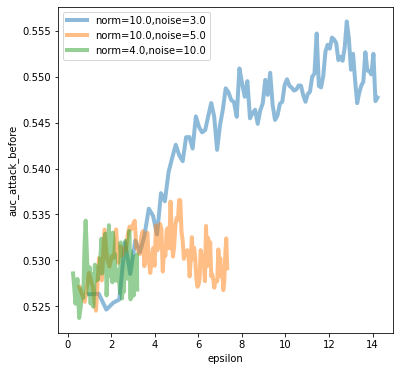

In [21]:
plot(fl_dp, y = 'auc_attack_before', x = 'epsilon')

### Conclusion
Both in the decentralized case as in the federated one, the version that does not use DP is very susceptible to MIAs. For the versions that use DP, the parameters can be changed to make them more accurate and less private or more private and less accurate.